<a href="https://colab.research.google.com/github/ankur150/ML-Projects/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the Dataset

In [ ]:
dataset = pd.read_csv('wine_data.csv')

Handling Missing Values

In [ ]:
# Checks the number of missing values per column
missing_values = dataset.isnull().sum()
missing_values

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Removing Duplicates

In [ ]:
# Check for duplicate rows
duplicates = dataset.duplicated().sum()
# Remove duplicates if any
dataset = dataset.drop_duplicates()

#Most frequently occurring wine quality and Highest and Lowest number in the quality column

In [ ]:
# Find the most frequently occurring wine quality
most_frequent_quality = dataset["quality"].mode()[0]

# Find the highest and lowest number in the quality column
highest_quality = dataset["quality"].max()
lowest_quality = dataset["quality"].min()

print("Most frequently occurring wine quality =",most_frequent_quality)
print("Highest Quality =",highest_quality)
print("Lowest Quality =",lowest_quality)

Most frequently occurring wine quality = 5
Highest Quality = 8
Lowest Quality = 3


#Correlation of fixed acidity, alcohol content, and free Sulphur dioxide to the quality of the wine

In [ ]:
# Compute correlation between features and quality
correlations = dataset.corr()["quality"]

# Extract specific correlations
fixed_acidity_corr = correlations["fixed acidity"]
alcohol_corr = correlations["alcohol"]
free_sulfur_corr = correlations["free sulfur dioxide"]

print("Fixed Acidity correlation with quality =",fixed_acidity_corr)
print("Alcohol correlation with quality =",alcohol_corr)
print("Free Sulfur Dioxide correlation with quality =",free_sulfur_corr)

Fixed Acidity correlation with quality = 0.11902366561349675
Alcohol correlation with quality = 0.48034289800155505
Free Sulfur Dioxide correlation with quality = -0.050462766805025684


A slight increase in wine quality is associated with higher fixed acidity, but the relationship is not strong. Higher alcohol content tends to be linked with better wine quality. Free sulfur dioxide has almost no correlation with wine quality, meaning it does not significantly impact the quality.

#Average residual sugar for the best quality wine and the lowest quality wine

In [ ]:
# Find the average residual sugar for the highest and lowest quality wines
avg_residual_sugar_best = dataset[dataset["quality"] == dataset["quality"].max()]["residual sugar"].mean()
avg_residual_sugar_lowest = dataset[dataset["quality"] == dataset["quality"].min()]["residual sugar"].mean()

print("Average residual sugar for the best quality wine =", avg_residual_sugar_best)
print("Average residual sugar for the lowest quality wine =" ,avg_residual_sugar_lowest)

Average residual sugar for the best quality wine = 2.576470588235294
Average residual sugar for the lowest quality wine = 2.6350000000000002


This indicates that residual sugar does not significantly vary between the highest and lowest quality wines.

#Effect of volatile acidity over the quality of the wine samples

In [ ]:
# Check correlation of volatile acidity with wine quality
volatile_acidity_corr = correlations["volatile acidity"]
print("Volatile Acidity Correlation with Quality =",volatile_acidity_corr)

Volatile Acidity Correlation with Quality = -0.39521368900984055


The correlation between volatile acidity and quality is -0.391, indicating a moderate negative correlation. This means that as volatile acidity increases, wine quality tends to decrease. High volatile acidity can give wine an undesirable sharp or sour taste, which might explain the negative impact on quality.

#Decision Tree Model & Random Forest Model

Splitting the dataset into independent and dependent variables

In [ ]:
x = dataset.iloc[:, [1, 10]] # As the top 2 most correlated features (including negative correlations) are alcohol and volatile acidity.
y = dataset.iloc[:, -1]

Feature Scaling using Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

Splitting the dataset into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Training the Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the test set results

In [ ]:
y_pred = classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  2  2  0  0  0]
 [ 0  2  5  5  0  0]
 [ 0  5 96 43  4  0]
 [ 3  1 50 59 17  2]
 [ 0  2  3 20 13  3]
 [ 0  1  0  1  1  0]]


0.5

Visualizing the results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


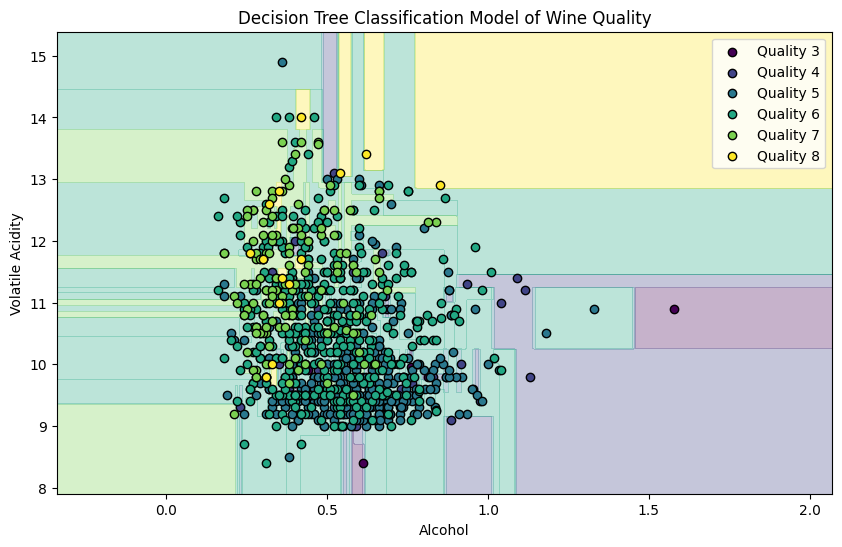

In [ ]:
from matplotlib.colors import ListedColormap

# Transform the dataset back for visualization
x_set, y_set = sc.inverse_transform(x_train), y_train

# Create mesh grid
x1_min, x1_max = x_set[:, 0].min() - 0.5, x_set[:, 0].max() + 0.5
x2_min, x2_max = x_set[:, 1].min() - 0.5, x_set[:, 1].max() + 0.5
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                     np.arange(x2_min, x2_max, 0.01))

# Predict on the grid
Z = classifier.predict(sc.transform(np.c_[x1.ravel(), x2.ravel()])).reshape(x1.shape)

# Define a colormap for multiple wine quality classes
unique_qualities = np.unique(y_train)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_qualities)))
cmap = ListedColormap(colors)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(x1, x2, Z, alpha=0.3, cmap=cmap)

# Scatter plot of actual data
for i, quality in enumerate(unique_qualities):
    plt.scatter(x_set[y_set == quality, 0], x_set[y_set == quality, 1],
                color=colors[i], label=f"Quality {quality}", edgecolor='k')

# Labels and title
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.title('Decision Tree Classification Model of Wine Quality')
plt.legend()
plt.show()

Training the Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

Predicting the test set results

In [ ]:
y_pred = classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0   1   3   0   0   0]
 [  0   0   6   6   0   0]
 [  0   2 100  42   4   0]
 [  2   0  50  69   8   3]
 [  0   1   4  17  16   3]
 [  0   0   0   1   2   0]]


0.5441176470588235

Visualizing the results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


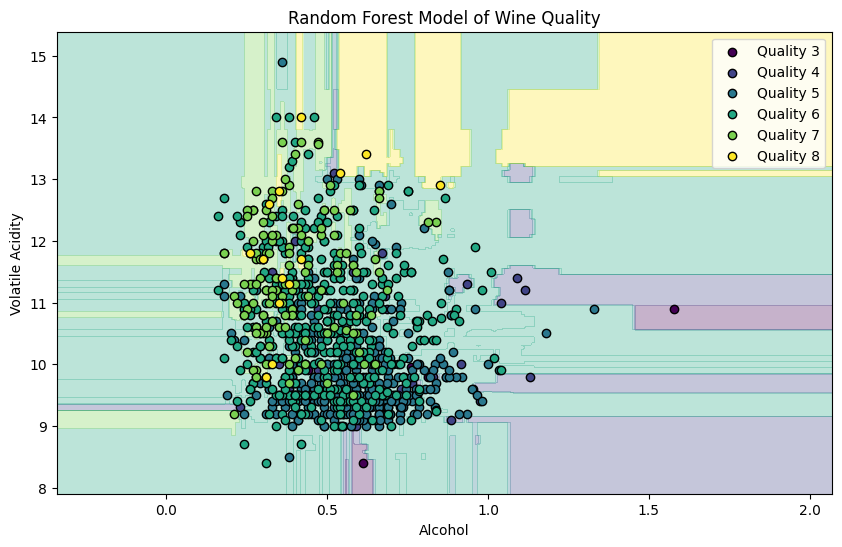

In [ ]:
from matplotlib.colors import ListedColormap

# Transform the dataset back for visualization
x_set, y_set = sc.inverse_transform(x_train), y_train

# Create mesh grid
x1_min, x1_max = x_set[:, 0].min() - 0.5, x_set[:, 0].max() + 0.5
x2_min, x2_max = x_set[:, 1].min() - 0.5, x_set[:, 1].max() + 0.5
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                     np.arange(x2_min, x2_max, 0.01))

# Predict on the grid
Z = classifier.predict(sc.transform(np.c_[x1.ravel(), x2.ravel()])).reshape(x1.shape)

# Define a colormap for multiple wine quality classes
unique_qualities = np.unique(y_train)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_qualities)))
cmap = ListedColormap(colors)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(x1, x2, Z, alpha=0.3, cmap=cmap)

# Scatter plot of actual data
for i, quality in enumerate(unique_qualities):
    plt.scatter(x_set[y_set == quality, 0], x_set[y_set == quality, 1],
                color=colors[i], label=f"Quality {quality}", edgecolor='k')

# Labels and title
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.title('Random Forest Model of Wine Quality')
plt.legend()
plt.show()

The accuracy of both models:
Decision Tree = 50%
Random Forest = 54.41176470588235%
The accuracy results (50% - 55%) suggest that both Decision Tree and Random Forest models are not performing very well on this dataset.